Feladatok Pandas DataFrame-el, a CRISP DM első lépései (Business understanding, data understanding, data preparation)

## Pandas DataFrames

Pandas is a high-level data manipulation tool developed by Wes McKinney. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

* You can use dictionary to create a DataFrame.

In [2]:
dict = { "country": ["Brazil", "Russia", "India", "China", "South Africa"],
       "capital": ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria"],
       "area": [8.516, 17.10, 3.286, 9.597, 1.221],
       "population": [200.4, 143.5, 1252, 1357, 52.98] }

import pandas as pd
brics = pd.DataFrame(dict)
brics

,country,capital,area,population
0,Brazil,Brasilia,8.516,200.40
1,Russia,Moscow,17.100,143.50
2,India,New Dehli,3.286,1252.00
3,China,Beijing,9.597,1357.00
4,South Africa,Pretoria,1.221,52.98


As you can see with the new brics DataFrame, Pandas has assigned a key for each country as the numerical values from 0 to 4. If you would like to have different index values, say, the two letter country code, you can do that easily as well.

In [3]:
# Set the index for brics
brics.index = ["BR", "RU", "IN", "CH", "SA"]

# Print out brics with new index values
brics

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Dehli,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


* You can create a DataFrame is by importing a csv file using Pandas.

Download the cars.csv file and import it by using pd.read_csv.

In [4]:
# Import the cars.csv data: cars
cars = pd.read_csv('cars.csv')

# Print out cars
print(cars)

  Unnamed: 0  cars_per_cap        country  drives_right
0         US           809  United States          True
1        AUS           731      Australia         False
2        JAP           588          Japan         False
3         IN            18          India         False
4         RU           200         Russia          True
5        MOR            70        Morocco          True
6         EG            45          Egypt          True


In [5]:
cars = cars.rename(columns={'Unnamed: 0':'country_code'})

In [6]:
cars

,country_code,cars_per_cap,country,drives_right
0,US,809,United States,True
1,AUS,731,Australia,False
2,JAP,588,Japan,False
3,IN,18,India,False
4,RU,200,Russia,True
5,MOR,70,Morocco,True
6,EG,45,Egypt,True


There are several ways to index a Pandas DataFrame. One of the easiest ways to do this is by using square bracket notation.<br>
In the example below, you can use square brackets to select one column of the cars DataFrame. You can either use a single bracket or a double bracket. The single bracket with output a Pandas Series, while a double bracket will output a Pandas DataFrame.

In [7]:
# Import cars.csv
cars = pd.read_csv('cars.csv', index_col = 0)
cars

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


In [10]:
# Printing as Pandas Series
print(cars['cars_per_cap'])

US     809
AUS    731
JAP    588
IN      18
RU     200
MOR     70
EG      45
Name: cars_per_cap, dtype: int64


In [11]:
# Printing as Pandas DataFrame
print(cars[['cars_per_cap']])

     cars_per_cap
US            809
AUS           731
JAP           588
IN             18
RU            200
MOR            70
EG             45


In [12]:
# Printing out DataFrame with more columns
print(cars[['cars_per_cap', 'country']])

     cars_per_cap        country
US            809  United States
AUS           731      Australia
JAP           588          Japan
IN             18          India
RU            200         Russia
MOR            70        Morocco
EG             45          Egypt


Square brackets can also be used to access observations (rows) from a DataFrame. 

In [13]:
# Print out first 4 observations
print(cars[0:4])

     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False
IN             18          India         False


In [14]:
# Print out fifth and sixth observation
print(cars[4:6])

     cars_per_cap  country  drives_right
RU            200   Russia          True
MOR            70  Morocco          True


You can also use 'loc' and 'iloc' to perform just about any data selection operation.<br>
'loc' is label-based, which means that you have to specify rows and columns based on their row and column labels.<br>
'iloc' is integer index based, so you have to specify rows and columns by their integer index like you did in the previous exercise.

In [15]:
# Print out observation for Japan
print(cars.iloc[[2]])

     cars_per_cap country  drives_right
JAP           588   Japan         False


In [16]:
# Print out observations for Australia and Egypt
print(cars.loc[['AUS', 'EG']])

     cars_per_cap    country  drives_right
AUS           731  Australia         False
EG             45      Egypt          True


## Exercise

### a)

* Load the JSON file from the following link: http://worldcup.sfg.io/matches
    * Try to find out how to open and read url
    * Use the urllib and json packages
    * Do not forget about the imports
* How many matches were played on the world cup?

In [17]:
# Imports
import json
import urllib


In [18]:
# Save the given url link to variable url
url = urllib.request.urlopen('http://worldcup.sfg.io/matches')

# Open the url and read the data: data
# Do not forget to decode it, HINT: use the .decode function with 'utf-8' argument
data = url.read().decode('utf-8')


In [28]:
# Check the data
#print(data)

In [29]:
# Use the json.loads function on your data to get json type
# Save the json-type data to variable vb
vb = json.loads(data)

# print the new variable to check the data
print(vb[0])

{'venue': 'Paris', 'location': 'Parc des Princes', 'status': 'completed', 'time': 'full-time', 'fifa_id': '300438238', 'weather': {'humidity': '78', 'temp_celsius': '15', 'temp_farenheit': '47', 'wind_speed': '32', 'description': 'Cloudy'}, 'attendance': '45261', 'officials': ['Claudia UMPIERREZ', 'Luciana MASCARANA', 'Monica AMBOYA', 'Melissa BORJAS', 'Mauro VIGLIANO', 'Felisha MARISCAL', 'Jose Maria SANCHEZ', 'Mariana DE ALMEIDA'], 'stage_name': 'First Stage', 'home_team_country': 'France', 'away_team_country': 'Korea Republic', 'datetime': '2019-06-07T19:00:00Z', 'winner': 'France', 'winner_code': 'FRA', 'home_team': {'country': 'France', 'code': 'FRA', 'goals': 4, 'penalties': 0}, 'away_team': {'country': 'Korea Republic', 'code': 'KOR', 'goals': 0, 'penalties': 0}, 'home_team_events': [{'id': 1, 'type_of_event': 'goal', 'player': 'Eugenie LE SOMMER', 'time': "9'"}, {'id': 2, 'type_of_event': 'goal', 'player': 'Griedge MBOCK BATHY', 'time': "27'"}, {'id': 3, 'type_of_event': 'goal'

In [21]:
# How many matches were played on the world cup? - print it 
print(len(vb))

52


### b) 

Print out the results of all the matches in the following format:
    country1 - country2 goal1:goal2 (e.g.: England - Panama 6:1)

In [30]:
# Go through all the elements of the vb json file 
# Print in each case the required data
# HINT: find the little dictionary in the big dictionary in which the number of goals is present
# Use this little dictionary for gaining the name of the country (who had that many goals) as well
for i in range(len(vb)):
    print(vb[i]['home_team']['country'], '-', vb[i]['away_team']['country'], vb[i]['home_team']['goals'], ':', vb[i]['away_team']['goals'])


France - Korea Republic 4 : 0
Germany - China PR 1 : 0
Spain - South Africa 3 : 1
Norway - Nigeria 3 : 0
Brazil - Jamaica 3 : 0
England - Scotland 2 : 1
Australia - Italy 1 : 2
Argentina - Japan 0 : 0
Canada - Cameroon 1 : 0
New Zealand - Netherlands 0 : 1
Chile - Sweden 0 : 2
USA - Thailand 13 : 0
Nigeria - Korea Republic 2 : 0
Germany - Spain 1 : 0
France - Norway 2 : 1
Australia - Brazil 3 : 2
South Africa - China PR 0 : 1
Japan - Scotland 2 : 1
Jamaica - Italy 0 : 5
England - Argentina 1 : 0
Netherlands - Cameroon 3 : 1
Canada - New Zealand 2 : 0
Sweden - Thailand 5 : 1
USA - Chile 3 : 0
China PR - Spain 0 : 0
South Africa - Germany 0 : 4
Nigeria - France 0 : 1
Korea Republic - Norway 1 : 2
Italy - Brazil 0 : 1
Jamaica - Australia 1 : 4
Japan - England 0 : 2
Scotland - Argentina 3 : 3
Cameroon - New Zealand 2 : 1
Netherlands - Canada 2 : 1
Thailand - Chile 0 : 2
Sweden - USA 0 : 2
Germany - Nigeria 3 : 0
Norway - Australia 1 : 1
England - Cameroon 3 : 0
France - Brazil 2 : 1
Spain 

### c) 

* Create a Pandas DataFrame:
    * Let the rows be the matches
    * Let the columns be the following: 
    'fifa_id', 'location', 'datetime', 'home_team_country', 'away_team_country', 'winner', 'home_team_statistics', 'away_team_statistics'
* Split the 'datetime' column into two columns: the day of the match and the starting time (hour, minute)

In [38]:
# Create a Pandas DataFrame from the vb data: table
table = pd.DataFrame(vb)

# Create a new, smaller table, which contains only the required columns: smalltable
smalltable = table[['fifa_id', 'location', 'datetime', 'home_team_country', 'away_team_country', 'winner', 'home_team_statistics', 'away_team_statistics']]

# Print the obtained DataFrame (smalltable)
smalltable.head()

,fifa_id,location,datetime,home_team_country,away_team_country,winner,home_team_statistics,away_team_statistics
0,300438238,Parc des Princes,2019-06-07T19:00:00Z,France,Korea Republic,France,"{'country': 'France', 'attempts_on_goal': 21, ...","{'country': 'Korea Republic', 'attempts_on_goa..."
1,300438216,Roazhon Park,2019-06-08T13:00:00Z,Germany,China PR,Germany,"{'country': 'Germany', 'attempts_on_goal': 18,...","{'country': 'China PR', 'attempts_on_goal': 4,..."
2,300438234,Stade Océane,2019-06-08T16:00:00Z,Spain,South Africa,Spain,"{'country': 'Spain', 'attempts_on_goal': 25, '...","{'country': 'South Africa', 'attempts_on_goal'..."
3,300438213,Stade Auguste-Delaune,2019-06-08T19:00:00Z,Norway,Nigeria,Norway,"{'country': 'Norway', 'attempts_on_goal': 10, ...","{'country': 'Nigeria', 'attempts_on_goal': 9, ..."
4,300438219,Stade des Alpes,2019-06-09T13:30:00Z,Brazil,Jamaica,Brazil,"{'country': 'Brazil', 'attempts_on_goal': 18, ...","{'country': 'Jamaica', 'attempts_on_goal': 13,..."


In [45]:
# Splitting the date
splitDate = smalltable['datetime'].str.split('T', expand=True)
splitDate.head()




,0,1
0,2019-06-07,19:00:00Z
1,2019-06-08,13:00:00Z
2,2019-06-08,16:00:00Z
3,2019-06-08,19:00:00Z
4,2019-06-09,13:30:00Z


### d) 

How many matches were played in each stadion? Plot the results on a pie chart.

In [58]:
# HINT: you can use the .groupby function (and .count() function)
import matplotlib.pyplot as plt

matchesInEachStadion = smalltable.groupby(['location']).count()['fifa_id']



# Print the number of played matches in each stadion (the above obtained result)
print(matchesInEachStadion)

location
Parc des Princes         7
Roazhon Park             7
Stade Auguste-Delaune    6
Stade Océane             7
Stade de Lyon            3
Stade de Nice            6
Stade de la Mosson       5
Stade des Alpes          5
Stade du Hainaut         6
Name: fifa_id, dtype: int64


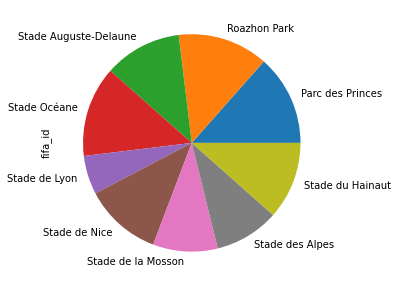

In [59]:
# Plot the results on a pie chart, show the plot
# Én próbálkozásom, nem jó
# labels = smalltable.groupby(['location']).count()['location']
# sizes = smalltable.groupby(['location']).count()['fifa_id']

# fig, ax = plt.subplots()
# ax.pie(sizes, labels=labels, startangle=90)
# ax.axis('equal')
# Hivatalos
matchesInEachStadion.plot.pie(y='location', figsize=(5,5))
plt.show()


### e) 

Create a scatterplot about the matches showing the connection between *'attempts'* and *'posession'*. <br>
Color the dots according to *'pass_accuracy'*.

Study the result and draw conclusions.

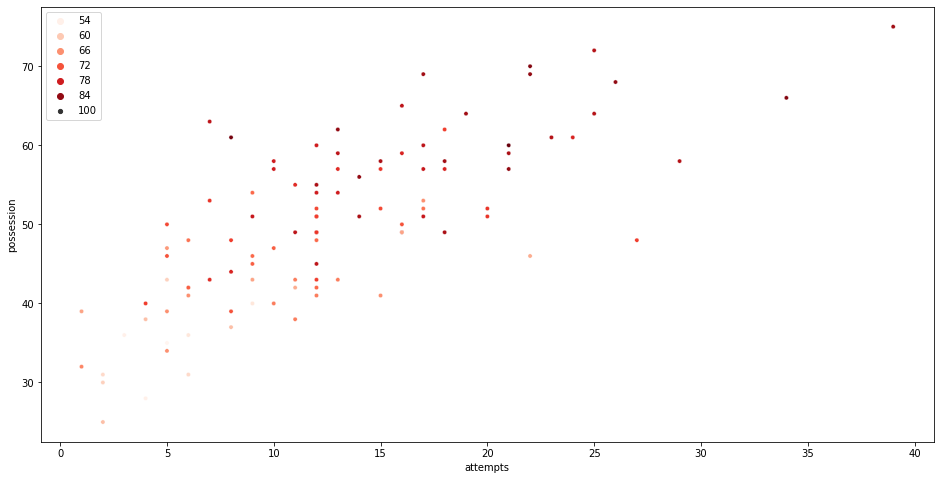

In [75]:
# Import seaborn
# Import cm from matplotlib
import seaborn as sns
from matplotlib import cm


# Create 3 empty lists: possession, attempts, accuracy
possession = []
attempts = []
accuracy = []



# Find out which column of the smalltable you should go through
# Fill up the above created lists
for i in range(len(smalltable)):
    possession.append(smalltable['home_team_statistics'][i]['ball_possession'])
    possession.append(smalltable['away_team_statistics'][i]['ball_possession'])
    attempts.append(smalltable['home_team_statistics'][i]['attempts_on_goal'])
    attempts.append(smalltable['away_team_statistics'][i]['attempts_on_goal'])
    accuracy.append(smalltable['home_team_statistics'][i]['pass_accuracy'])
    accuracy.append(smalltable['away_team_statistics'][i]['pass_accuracy'])

# Create a plt figure with size (16,8)
plt.figure(figsize=(16,8))

# Create an sns scatterplot showing the connection between 'attempts' and 'posession'
# Color the dots according to 'pass_accuracy'.
# Set the size of the dots 
# Set a color palette 
sns.scatterplot(x=attempts, y=possession, hue=accuracy, palette=cm.Reds, size=100)

# Label the axes
plt.ylabel('possession')
plt.xlabel('attempts')


# Show the plot
plt.show()
